# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
#Type your code here
# Untuk manipulasi data
import pandas as pd
import numpy as np

# Untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk preprocessing data (akan minimalis karena data sudah preprocessed dari Clustering)
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Tambahkan MinMaxScaler jika perlu re-scale

# Untuk pembagian dataset (train_test_split)
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold # StratifiedKFold untuk imbalance data

# Untuk algoritma klasifikasi (sesuai kriteria Skilled/Advanced)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier # Contoh algoritma lain
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Untuk evaluasi model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc

# Untuk Hyperparameter Tuning (Kriteria Advanced)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Untuk menyimpan model .h5
import joblib

# Menghilangkan warning (opsional, untuk tampilan notebook yang lebih bersih)
import warnings
warnings.filterwarnings('ignore')

# Set style visualisasi (opsional, untuk estetika)
sns.set_style("whitegrid")

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")

# Muat dataset
df = pd.read_csv('https://raw.githubusercontent.com/siangmalamturu/Project3/refs/heads/main/data_clustering_inverse.csv')

In [3]:
# Tampilkan 5 baris pertama dengan function head.
print(df.head())
print("\n" + "="*50 + "\n")

   TransactionAmount TransactionType   Location Channel  CustomerAge  \
0              14.09           Debit  San Diego     ATM         70.0   
1             376.24           Debit    Houston     ATM         68.0   
2             126.29           Debit       Mesa  Online         19.0   
3             184.50           Debit    Raleigh  Online         26.0   
4              13.45           Debit    Atlanta  Online         45.0   

  CustomerOccupation  TransactionDuration  LoginAttempts  AccountBalance  \
0             Doctor                 81.0            1.0         5112.21   
1             Doctor                141.0            1.0        13758.91   
2            Student                 56.0            1.0         1122.35   
3            Student                 25.0            1.0         8569.06   
4            Student                198.0            1.0         7429.40   

   TransactionAmount_Category_Encoded  Target  
0                                   0       2  
1             

In [4]:
# 1. Pemisahan Fitur (X) dan Target (y)
X = df.drop(columns=['Target']) # X adalah semua fitur, tanpa kolom 'Target'
y = df['Target'] # y adalah kolom 'Target' (label cluster)

print("Fitur (X) dan Target (y) berhasil dipisahkan.")
print(f"Bentuk X: {X.shape}")
print(f"Bentuk y: {y.shape}")

print("\nDistribusi kelas target (y):")
print(y.value_counts(normalize=True))

print("\n" + "="*50 + "\n")


# 2. Encoding Fitur Kategorikal (Jika Ada)
# Ini penting karena data_clustering_inverse.csv mengembalikan fitur kategorikal ke string.
print("Melakukan encoding fitur kategorikal (jika ada) dan verifikasi data:")
categorical_cols_for_encoding_clas_final = X.select_dtypes(include='object').columns.tolist()

# Simpan encoder baru untuk klasifikasi jika diperlukan untuk interpretasi nanti
label_encoders_clas = {}

if categorical_cols_for_encoding_clas_final:
    print("\n  Meng-encode fitur kategorikal:")
    for col in categorical_cols_for_encoding_clas_final:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders_clas[col] = le # Simpan encoder
        print(f"    Kolom '{col}' di-encode.")
else:
    print("\n  Tidak ada fitur kategorikal (object) yang perlu di-encode ulang.")

# 3. Penskalaan Ulang Fitur Numerik (Opsional, tapi umum untuk model sensitif skala)
# Meskipun data sudah di-inverse transform ke skala asli, model tertentu (misal SVM, KNN, Logistic Regression)
# mungkin bekerja lebih baik dengan fitur yang diskalakan ulang (misal StandardScaler).
# Kita akan lakukan scaling di sini agar X_train/X_test sudah bersih dan siap untuk semua model.
print("\nMelakukan penskalaan ulang fitur numerik (StandardScaler):")
numeric_cols_for_scaling_clas_final = X.select_dtypes(include=np.number).columns.tolist()
scaler_clas = StandardScaler() # StandardScaler umum untuk model sensitif skala

if numeric_cols_for_scaling_clas_final:
    X[numeric_cols_for_scaling_clas_final] = scaler_clas.fit_transform(X[numeric_cols_for_scaling_clas_final])
    print("  Fitur numerik setelah penskalaan (head):")
    print(X[numeric_cols_for_scaling_clas_final].head())
else:
    print("  Tidak ada fitur numerik yang perlu diskalakan ulang.")

print("\nVerifikasi tipe data setelah preprocessing untuk Klasifikasi:")
print(X.info())
print("\nDataFrame X setelah Preprocessing Klasifikasi Final (head):")
print(X.head())

print("\n" + "="*50 + "\n")

Fitur (X) dan Target (y) berhasil dipisahkan.
Bentuk X: (2513, 10)
Bentuk y: (2513,)

Distribusi kelas target (y):
Target
2    0.276164
0    0.266614
3    0.235575
1    0.221647
Name: proportion, dtype: float64


Melakukan encoding fitur kategorikal (jika ada) dan verifikasi data:

  Meng-encode fitur kategorikal:
    Kolom 'TransactionType' di-encode.
    Kolom 'Location' di-encode.
    Kolom 'Channel' di-encode.
    Kolom 'CustomerOccupation' di-encode.

Melakukan penskalaan ulang fitur numerik (StandardScaler):
  Fitur numerik setelah penskalaan (head):
   TransactionAmount  TransactionType  Location   Channel  CustomerAge  \
0          -1.079941              0.0  1.188149 -1.216533     1.430203   
1           0.371085              0.0 -0.506505 -1.216533     1.317452   
2          -0.630390              0.0  0.139078  1.190670    -1.444942   
3          -0.397160              0.0  0.946056  1.190670    -1.050314   
4          -1.082505              0.0 -1.636274  1.190670     0.020

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [5]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

# Menggunakan penamaan terformat pada target dari dataset yaitu Target.

# X dan y sudah siap dari bagian 4. Data Preprocessing

# Membagi dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

print("\nProporsi kelas di y_train:")
print(y_train.value_counts(normalize=True))
print("\nProporsi kelas di y_test:")
print(y_test.value_counts(normalize=True))

print("\n" + "="*50 + "\n")

Ukuran X_train: (2010, 10)
Ukuran X_test: (503, 10)
Ukuran y_train: (2010,)
Ukuran y_test: (503,)

Proporsi kelas di y_train:
Target
2    0.276119
0    0.266667
3    0.235323
1    0.221891
Name: proportion, dtype: float64

Proporsi kelas di y_test:
Target
2    0.276342
0    0.266402
3    0.236581
1    0.220676
Name: proportion, dtype: float64




# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

Melatih model Decision Tree...
Model Decision Tree selesai dilatih.

--- Evaluasi Model Decision Tree ---
Akurasi: 1.0000
Presisi (weighted): 1.0000
Recall (weighted): 1.0000
F1-Score (weighted): 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       119

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Confusion Matrix:


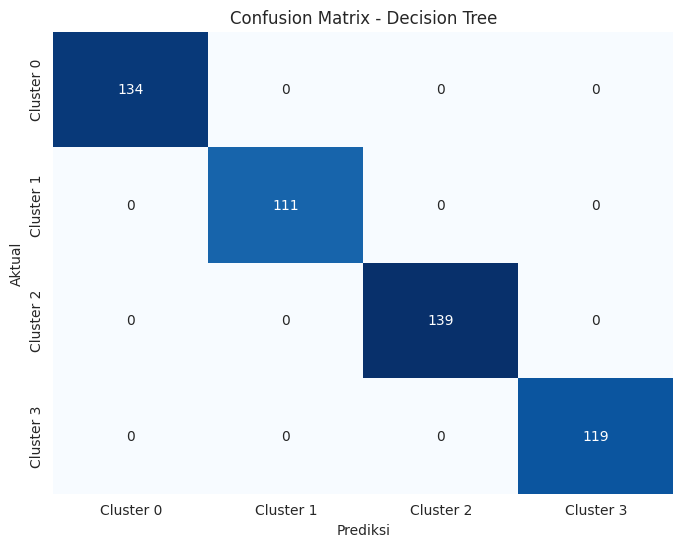

In [6]:
# Buatlah model klasifikasi menggunakan Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)

print("Melatih model Decision Tree...")
dt_model.fit(X_train, y_train)
print("Model Decision Tree selesai dilatih.")

y_pred_dt = dt_model.predict(X_test)

print("\n--- Evaluasi Model Decision Tree ---")
print(f"Akurasi: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Presisi (weighted): {precision_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"Recall (weighted): {recall_score(y_test, y_pred_dt, average='weighted'):.4f}")
print(f"F1-Score (weighted): {f1_score(y_test, y_pred_dt, average='weighted'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Cluster {i}' for i in sorted(y.unique())],
            yticklabels=[f'Cluster {i}' for i in sorted(y.unique())])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

print("\n" + "="*50 + "\n")

In [7]:
# Menyimpan Model
# import joblib
# joblib.dump(model, 'decision_tree_model.h5')
joblib.dump(dt_model, 'decision_tree_model.h5')
print("Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'.")

print("\n" + "="*50 + "\n")

Model Decision Tree berhasil disimpan sebagai 'decision_tree_model.h5'.




# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [8]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

# Inisialisasi model-model lain
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(random_state=42, probability=True), # probability=True untuk ROC curve
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Dictionary untuk menyimpan hasil evaluasi
results = {}
trained_models = {}

print("Melatih dan mengevaluasi algoritma klasifikasi lain:")
for name, model in models.items():
    print(f"\n--- Melatih Model: {name} ---")

    # Untuk model yang sensitif skala (LR, KNN, SVM), data X_train/X_test sudah diskalakan di 4.2.
    # Untuk Decision Tree, Random Forest, Naive Bayes tidak terlalu membutuhkan scaling.
    # Kita menggunakan X_train dan X_test yang sudah melalui proses penskalaan di 4.2

    model.fit(X_train, y_train) # X_train sudah siap dari 4.2
    y_pred = model.predict(X_test) # X_test sudah siap dari 4.2

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}
    trained_models[name] = model # Simpan model yang sudah dilatih

    print(f"  Akurasi: {accuracy:.4f}")
    print(f"  Presisi (weighted): {precision:.4f}")
    print(f"  Recall (weighted): {recall:.4f}")
    print(f"  F1-Score (weighted): {f1:.4f}")

print("\n" + "="*50 + "\n")

Melatih dan mengevaluasi algoritma klasifikasi lain:

--- Melatih Model: Logistic Regression ---
  Akurasi: 0.9920
  Presisi (weighted): 0.9920
  Recall (weighted): 0.9920
  F1-Score (weighted): 0.9920

--- Melatih Model: K-Nearest Neighbors ---
  Akurasi: 0.7773
  Presisi (weighted): 0.7781
  Recall (weighted): 0.7773
  F1-Score (weighted): 0.7748

--- Melatih Model: Support Vector Machine ---
  Akurasi: 0.9503
  Presisi (weighted): 0.9514
  Recall (weighted): 0.9503
  F1-Score (weighted): 0.9505

--- Melatih Model: Naive Bayes ---
  Akurasi: 0.9980
  Presisi (weighted): 0.9980
  Recall (weighted): 0.9980
  F1-Score (weighted): 0.9980

--- Melatih Model: Random Forest ---
  Akurasi: 1.0000
  Presisi (weighted): 1.0000
  Recall (weighted): 1.0000
  F1-Score (weighted): 1.0000




In [9]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.
print("Ringkasan Evaluasi Seluruh Model:")
results_df = pd.DataFrame(results).T # Transpose DataFrame untuk tampilan yang lebih baik
print(results_df)

# Identifikasi model terbaik berdasarkan F1-Score (atau metrik lain yang Anda prioritaskan)
best_model_name = results_df['f1_score'].idxmax()
best_model_performance = results_df.loc[best_model_name]

print(f"\nModel terbaik berdasarkan F1-Score adalah: {best_model_name}")
print(f"Kinerja model terbaik:\n{best_model_performance}")

print("\n" + "="*50 + "\n")

Ringkasan Evaluasi Seluruh Model:
                        accuracy  precision    recall  f1_score
Logistic Regression     0.992048   0.992050  0.992048  0.992041
K-Nearest Neighbors     0.777336   0.778092  0.777336  0.774757
Support Vector Machine  0.950298   0.951363  0.950298  0.950463
Naive Bayes             0.998012   0.998027  0.998012  0.998012
Random Forest           1.000000   1.000000  1.000000  1.000000

Model terbaik berdasarkan F1-Score adalah: Random Forest
Kinerja model terbaik:
accuracy     1.0
precision    1.0
recall       1.0
f1_score     1.0
Name: Random Forest, dtype: float64




In [10]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

# Simpan model terbaik dari fase eksplorasi
best_explored_model = trained_models[best_model_name]
explore_model_filename = f'explore_{best_model_name.replace(" ", "_").lower()}_classification.h5' # Ganti spasi dengan underscore dan lowercase
joblib.dump(best_explored_model, explore_model_filename)
print(f"Model terbaik dari eksplorasi ({best_model_name}) berhasil disimpan sebagai '{explore_model_filename}'.")

print("\n" + "="*50 + "\n")

Model terbaik dari eksplorasi (Random Forest) berhasil disimpan sebagai 'explore_random_forest_classification.h5'.




Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [11]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.

print(f"Melakukan Hyperparameter Tuning pada model terbaik: {best_model_name}")

# Pilih model terbaik untuk tuning
model_to_tune = trained_models[best_model_name]

# Definisikan parameter grid untuk tuning.
# Contoh parameter grid (sesuaikan jika model terbaik Anda berbeda)
if best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    tuned_model_type = RandomForestClassifier
elif best_model_name == 'Decision Tree':
    param_grid = {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 3, 5]
    }
    tuned_model_type = DecisionTreeClassifier
elif best_model_name == 'Logistic Regression':
    param_grid = {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs']
    }
    tuned_model_type = LogisticRegression
elif best_model_name == 'K-Nearest Neighbors':
    param_grid = {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }
    tuned_model_type = KNeighborsClassifier
elif best_model_name == 'Support Vector Machine':
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }
    tuned_model_type = SVC
elif best_model_name == 'Naive Bayes': # GaussianNB biasanya tidak punya banyak hyperparameter tuning yang signifikan
    param_grid = {} # Tidak ada tuning parameter utama, bisa kosong atau parameter kecil
    tuned_model_type = GaussianNB

else:
    print(f"Parameter grid default digunakan untuk '{best_model_name}'.")
    param_grid = {} # Grid kosong jika model tidak dikenal atau tidak ada tuning

# Inisialisasi GridSearchCV
# cv=StratifiedKFold untuk menjaga proporsi kelas
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Buat instance model baru untuk tuning
# Pastikan random_state di set jika model mendukung
if hasattr(tuned_model_type, 'random_state'):
    tuned_model_instance = tuned_model_type(random_state=42)
else:
    tuned_model_instance = tuned_model_type()

grid_search = GridSearchCV(
    estimator=tuned_model_instance,
    param_grid=param_grid,
    cv=kf,
    scoring='f1_weighted', # Metrik scoring yang akan dioptimalkan
    n_jobs=-1, # Menggunakan semua core CPU
    verbose=1 # Menampilkan progress
)

# Latih GridSearchCV
# X_train sudah melalui preprocessing final di 4.2
grid_search.fit(X_train, y_train)

# Dapatkan parameter terbaik
best_params = grid_search.best_params_
best_score = grid_search.best_score_
tuned_model = grid_search.best_estimator_ # Model dengan parameter terbaik setelah tuning

print(f"\nHyperparameter tuning selesai untuk {best_model_name}.")
print(f"Parameter terbaik: {best_params}")
print(f"Skor F1 terbaik dari Cross-Validation: {best_score:.4f}")

# Simpan model yang sudah dituning
joblib.dump(tuned_model, 'tuning_classification.h5')
print("Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'.")

print("\n" + "="*50 + "\n")

Melakukan Hyperparameter Tuning pada model terbaik: Random Forest
Fitting 5 folds for each of 36 candidates, totalling 180 fits

Hyperparameter tuning selesai untuk Random Forest.
Parameter terbaik: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Skor F1 terbaik dari Cross-Validation: 1.0000
Model hasil tuning berhasil disimpan sebagai 'tuning_classification.h5'.




--- Evaluasi Model Hasil Tuning: Random Forest ---
Akurasi (Tuned): 1.0000
Presisi (weighted, Tuned): 1.0000
Recall (weighted, Tuned): 1.0000
F1-Score (weighted, Tuned): 1.0000

Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       111
           2       1.00      1.00      1.00       139
           3       1.00      1.00      1.00       119

    accuracy                           1.00       503
   macro avg       1.00      1.00      1.00       503
weighted avg       1.00      1.00      1.00       503


Confusion Matrix (Tuned Model):


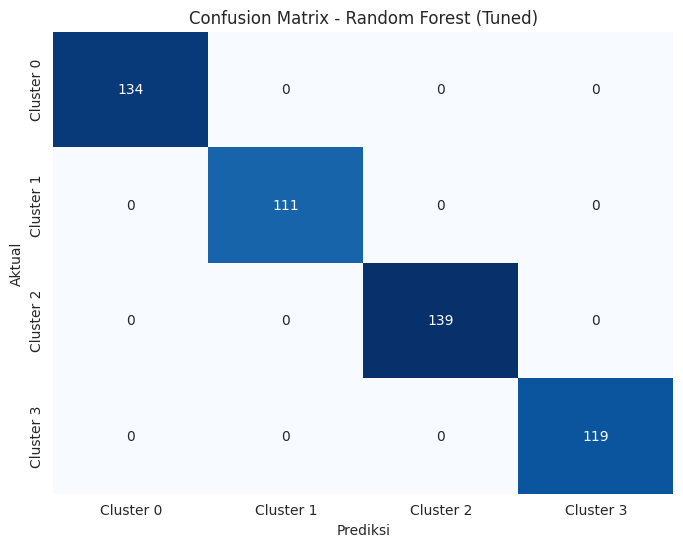

In [12]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

print(f"--- Evaluasi Model Hasil Tuning: {best_model_name} ---")

# Prediksi pada data uji (X_test) menggunakan model yang sudah dituning
# X_test juga sudah melalui preprocessing final di 4.2
y_pred_tuned = tuned_model.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='weighted')
recall_tuned = recall_score(y_test, y_pred_tuned, average='weighted')
f1_tuned = f1_score(y_test, y_pred_tuned, average='weighted')

print(f"Akurasi (Tuned): {accuracy_tuned:.4f}")
print(f"Presisi (weighted, Tuned): {precision_tuned:.4f}")
print(f"Recall (weighted, Tuned): {recall_tuned:.4f}")
print(f"F1-Score (weighted, Tuned): {f1_tuned:.4f}")

print("\nClassification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

print("\nConfusion Matrix (Tuned Model):")
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=[f'Cluster {i}' for i in sorted(y.unique())],
            yticklabels=[f'Cluster {i}' for i in sorted(y.unique())])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title(f'Confusion Matrix - {best_model_name} (Tuned)')
plt.show()

print("\n" + "="*50 + "\n")

In [13]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(__, 'tuning_classification.h5')

# Model hasil tuning sudah disimpan di cell 5.7. Ini hanya untuk memastikan kriteria terpenuhi.
print("Model hasil tuning sudah disimpan sebagai 'tuning_classification.h5' di bagian 5.7.")

print("\n" + "="*50 + "\n")

Model hasil tuning sudah disimpan sebagai 'tuning_classification.h5' di bagian 5.7.




End of Code